In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
''' In logistic regression, instead of expressing the response variable directly as a function of the explanatory variable, we express the probability of the response variable being equal to 1 (or 0) as a function of the explanatory variable.
 For the case where the response variable is categorical, logistic regression provides a more natural modeling framework
 '''
# init arrays to hold training data
train_num_hits = np.empty([0,1])
train_win_label = np.empty([0,1])

# Path to data files
fp = "gl2010_17/"

for year in range(2011, 2017):
    
    log_file = "%sGL%s.TXT" % (fp, year)

    # Creating the dataframe
    df = pd.read_table(log_file, sep=",", header=None)
    
    # Rename colums
    df.rename(columns = {6: 'Home Team', 9: 'Runs Visitor', 10: 'Runs Home', 50: 'Hits Home'}, inplace=True)
    
    # Addition of new column to indicate which team won the game
    df['Home Win'] = (df['Runs Home'] > df['Runs Visitor'])
    
    # Add to training set
    train_num_hits = np.vstack([train_num_hits, df['Hits Home'].values.reshape([-1, 1])])
    train_win_label = np.vstack([train_win_label, df['Home Win'].values.reshape([-1, 1])])
    

             0  1    2    3   4    5 Home Team   7    8  Runs Visitor ...  \
0     20110331  0  Thu  MIL  NL    1       CIN  NL    1             6 ...   
1     20110331  0  Thu  SFN  NL    1       LAN  NL    1             1 ...   
2     20110331  0  Thu  SDN  NL    1       SLN  NL    1             5 ...   
3     20110331  0  Thu  ATL  NL    1       WAS  NL    1             2 ...   
4     20110331  0  Thu  ANA  AL    1       KCA  AL    1             4 ...   
5     20110331  0  Thu  DET  AL    1       NYA  AL    1             3 ...   
6     20110401  0  Fri  PIT  NL    1       CHN  NL    1             6 ...   
7     20110401  0  Fri  ARI  NL    1       COL  NL    1             7 ...   
8     20110401  0  Fri  NYN  NL    1       FLO  NL    1             2 ...   
9     20110401  0  Fri  SFN  NL    2       LAN  NL    2             3 ...   
10    20110401  0  Fri  HOU  NL    1       PHI  NL    1             4 ...   
11    20110401  0  Fri  CHA  AL    1       CLE  AL    1            15 ...   

             0  1    2    3   4    5 Home Team   7    8  Runs Visitor ...   \
0     20140322  0  Sat  LAN  NL    1       ARI  NL    1             3 ...    
1     20140323  0  Sun  LAN  NL    2       ARI  NL    2             7 ...    
2     20140330  0  Sun  LAN  NL    3       SDN  NL    1             1 ...    
3     20140331  0  Mon  SEA  AL    1       ANA  AL    1            10 ...    
4     20140331  0  Mon  BOS  AL    1       BAL  AL    1             1 ...    
5     20140331  0  Mon  MIN  AL    1       CHA  AL    1             3 ...    
6     20140331  0  Mon  KCA  AL    1       DET  AL    1             3 ...    
7     20140331  0  Mon  CLE  AL    1       OAK  AL    1             2 ...    
8     20140331  0  Mon  TOR  AL    1       TBA  AL    1             2 ...    
9     20140331  0  Mon  PHI  NL    1       TEX  AL    1            14 ...    
10    20140331  0  Mon  SFN  NL    1       ARI  NL    3             9 ...    
11    20140331  0  Mon  SLN  NL    1       CIN  NL    1         

             0  1    2    3   4    5 Home Team   7    8  Runs Visitor ...  \
0     20160403  0  Sun  NYN  NL    1       KCA  AL    1             3 ...   
1     20160403  0  Sun  TOR  AL    1       TBA  AL    1             5 ...   
2     20160403  0  Sun  SLN  NL    1       PIT  NL    1             1 ...   
3     20160404  0  Mon  CHN  NL    1       ANA  AL    1             9 ...   
4     20160404  0  Mon  MIN  AL    1       BAL  AL    1             2 ...   
5     20160404  0  Mon  CHA  AL    1       OAK  AL    1             4 ...   
6     20160404  0  Mon  TOR  AL    2       TBA  AL    2             5 ...   
7     20160404  0  Mon  SEA  AL    1       TEX  AL    1             2 ...   
8     20160404  0  Mon  COL  NL    1       ARI  NL    1            10 ...   
9     20160404  0  Mon  WAS  NL    1       ATL  NL    1             4 ...   
10    20160404  0  Mon  PHI  NL    1       CIN  NL    1             2 ...   
11    20160404  0  Mon  SFN  NL    1       MIL  NL    1            12 ...   

In [18]:
# Instantiate logistic regression object 
log_regr = linear_model.LogisticRegression()

# Fit model to training data 
log_regr.fit(train_num_hits, train_win_label.ravel())

print("Slope = ", float(log_regr.coef_), " Intercept = ", float(log_regr.intercept_))

Slope =  0.24426363711233476  Intercept =  -1.9321719865633498


/Users/branlyon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
# Get performance score for training data

log_regr_score_train = log_regr.score(train_num_hits, train_win_label.ravel())
print("Percentage correct on training set = ", 100. * log_regr_score_train, "%")

Percentage correct on training set =  65.02023736022501 %


In [25]:
# Estimate probability of home team winning the game as a function of number of hits
hits_range = np.arange(np.min(train_num_hits), np.max(train_num_hits))
prob = np.zeros([len(hits_range), 1])
for hits in hits_range:
    index = np.where(train_num_hits == hits)
    if len(index[0]) > 0:
        prob[int(hits - np.min(train_num_hits))] = np.sum(train_win_label[index[0]]) / len(index[0])

In [26]:
# Get the probabilities as estimated by the model
prob_model = log_regr.predict_proba(train_num_hits)

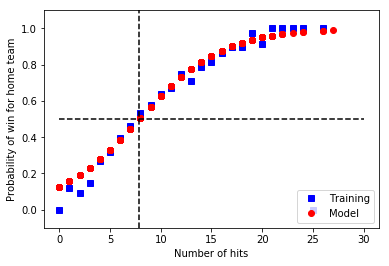

In [27]:
# Plot and visualize input and estimated probs
plt.plot(hits_range, prob, 'bs', label="Training")
plt.plot(train_num_hits, prob_model[:, 1], 'ro', label="Model")
plt.plot([0, 30], [.5, .5], "k--")
plt.plot([7.89, 7.89], [-.1, 1.1], "k--")
plt.ylim([-.1, 1.1])
plt.legend(loc="lower right")
plt.xlabel("Number of hits")
plt.ylabel("Probability of win for home team")
plt.show()

In [30]:
# Evaluating moderl on test data 

lg = "%sGL%s.TXT" % (fp, 2016)
df = pd.read_table(lg, sep=",", header=None)

# rename columns
df.rename(columns = {6: 'Home Team', 9: 'Runs Visitor', 10: 'Runs Home', 50: 'Hits Home'}, inplace=True)

# Add new columns to indicate whether home team or visiting team won the game
df['Home Win'] = (df['Runs Home'] > df['Runs Visitor'])

# Construct test data
test_num_hits = df['Hits Home'].values.reshape([-1, 1])
test_win_label = df['Home Win'].values.reshape([-1, 1])


In [31]:
predict_win_label = log_regr.predict(test_num_hits)


In [32]:
# Evaluate overall performance of the model on th test set using score method 
log_regr_score_test = log_regr.score(test_num_hits, test_win_label.ravel())
print("Percentage correct on test set = ", 100. * log_regr_score_test, "%")

Percentage correct on test set =  66.76276771004942 %


In [34]:
# Quantify accuracy of the model as a function of number of hits
delta = np.abs(test_win_label.ravel() - predict_win_label.ravel())
hits_range = np.arange(np.min(test_num_hits), np.max(test_num_hits))
frac_correct = np.zeros([len(hits_range), 1])
for hits in hits_range:
    index_all = np.where(test_num_hits == hits)
    index_correct = np.where((test_num_hits.ravel() == hits) & (delta.ravel() == 0))
    frac_correct[int(hits - np.min(test_num_hits))] = len(index_correct[0]) / len(index_all[0])
    

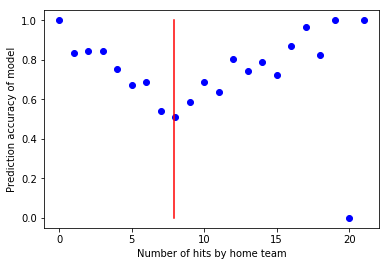

In [35]:
# Visualize frac_correct
# We can see that the model accuracy is at its lowest when home team gets 7 or 8 hits
# The accuracy improves as we move away in either direction 
plt.plot(hits_range, frac_correct, 'bo')
plt.xlabel("Number of hits by home team")
plt.ylabel("Prediction accuracy of model")
mid_point = -1. * float(log_regr.intercept_) / float(log_regr.coef_)
plt.plot([mid_point, mid_point], [0, 1], 'r')
plt.show()